<a href="https://colab.research.google.com/github/lazregroudayna/Hotel_Reservation/blob/main/Rain_in_Australia_Projectt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**In this project i had taken Rain in Australia dataset from kaggle,by using this dataset i will Predict wheather it will rain or not rain tommorow by training and building a bianary classification model using Logistic Regression by using Python and Scikit-Learn**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('weatherAUS.csv')
df.head(7)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No


In [ ]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
20760,2016-07-02,NorahHead,7.6,16.2,0.0,NaN,NaN,WNW,22.0,WNW,...,62.0,51.0,1025.3,1023.4,NaN,NaN,11.7,15.4,No,No
39928,2010-01-26,Williamtown,21.4,36.7,6.2,5.6,10.1,WSW,35.0,N,...,91.0,52.0,1010.3,1005.6,5.0,1.0,24.5,35.4,Yes,Yes
36111,2016-05-04,SydneyAirport,15.4,25.8,0.0,8.0,10.2,SSE,28.0,NW,...,44.0,NaN,1015.3,1014.0,1.0,2.0,20.3,23.3,No,No
41355,2014-03-22,Williamtown,14.5,30.5,NaN,NaN,NaN,E,28.0,NW,...,98.0,42.0,1018.7,1015.4,8.0,NaN,17.9,29.7,NaN,NaN
42738,2009-06-10,Wollongong,8.2,13.8,0.0,NaN,NaN,W,80.0,WSW,...,46.0,40.0,1010.0,1012.6,NaN,NaN,9.5,12.9,No,No


In [ ]:
df.shape

(43371, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43371 entries, 0 to 43370
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           43371 non-null  object 
 1   Location       43370 non-null  object 
 2   MinTemp        42854 non-null  float64
 3   MaxTemp        42990 non-null  float64
 4   Rainfall       42156 non-null  float64
 5   Evaporation    22215 non-null  float64
 6   Sunshine       16920 non-null  float64
 7   WindGustDir    38232 non-null  object 
 8   WindGustSpeed  38237 non-null  float64
 9   WindDir9am     38632 non-null  object 
 10  WindDir3pm     41203 non-null  object 
 11  WindSpeed9am   42491 non-null  float64
 12  WindSpeed3pm   41860 non-null  float64
 13  Humidity9am    42664 non-null  float64
 14  Humidity3pm    42003 non-null  float64
 15  Pressure9am    36657 non-null  float64
 16  Pressure3pm    36671 non-null  float64
 17  Cloud9am       26262 non-null  float64
 18  Cloud3

# **Overview on Features od the Data**
*   There is date variable in the denoted as Date.
*   Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow are the categorical variable.
*   RainToday, RainTomorrow are binary categorical Variable.
*   MinTemp, MaxTemp Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm are numerical varibles
Cloud9am, 'Cloud3pm are discrete variables.
*   MinTemp, MaxTemp Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm are continuous variable
*   Our Target variable is RainTomorrow













In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,42854.000000,42990.000000,42156.000000,22215.000000,16920.000000,38237.000000,42491.000000,41860.000000,42664.000000,42003.000000,36657.000000,36671.000000,26262.000000,25970.000000,42900.000000,42237.000000
mean,13.137604,23.854027,2.684602,5.621873,7.583688,38.649162,13.022640,17.769517,69.981624,52.151418,1018.278820,1015.725453,4.327469,4.409973,17.681289,22.385442
std,5.804873,6.027769,9.367318,4.575636,3.829433,13.812081,9.054741,9.350373,17.464015,20.499694,6.701465,6.650942,2.922437,2.703805,5.401104,5.862578
min,-4.800000,6.300000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.000000,6.000000
25%,8.900000,19.400000,0.000000,2.800000,4.800000,30.000000,6.000000,11.000000,58.000000,37.000000,1013.800000,1011.200000,1.000000,2.000000,13.800000,18.100000
50%,13.700000,23.300000,0.000000,4.600000,8.700000,37.000000,13.000000,17.000000,71.000000,52.000000,1018.400000,1015.800000,5.000000,5.000000,18.200000,21.800000
75%,17.800000,27.500000,0.800000,7.400000,10.500000,46.000000,19.000000,24.000000,83.000000,67.000000,1022.800000,1020.200000,7.000000,7.000000,21.700000,25.900000
max,29.700000,47.300000,371.000000,145.000000,14.100000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1037.000000,9.000000,8.000000,37.700000,46.700000


In [ ]:
df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43366,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43367,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
43368,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
43369,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [ ]:
l=df.columns
l


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.duplicated().any()

False

In [ ]:
df.isnull().sum()

Date                 0
Location             1
MinTemp            517
MaxTemp            381
Rainfall          1215
Evaporation      21156
Sunshine         26451
WindGustDir       5139
WindGustSpeed     5134
WindDir9am        4739
WindDir3pm        2168
WindSpeed9am       880
WindSpeed3pm      1511
Humidity9am        707
Humidity3pm       1368
Pressure9am       6714
Pressure3pm       6700
Cloud9am         17109
Cloud3pm         17401
Temp9am            471
Temp3pm           1134
RainToday         1215
RainTomorrow      1214
dtype: int64

In [ ]:
# prompt: plotPerColumnDistribution(df1, 10, 5)

def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()

    # Filter columns that are not useful for plotting
    df1 = df1[[col for col in df1 if 1 < nunique[col] < 50]]

    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow

    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80)

    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df1.iloc[:, i]

        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()

        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


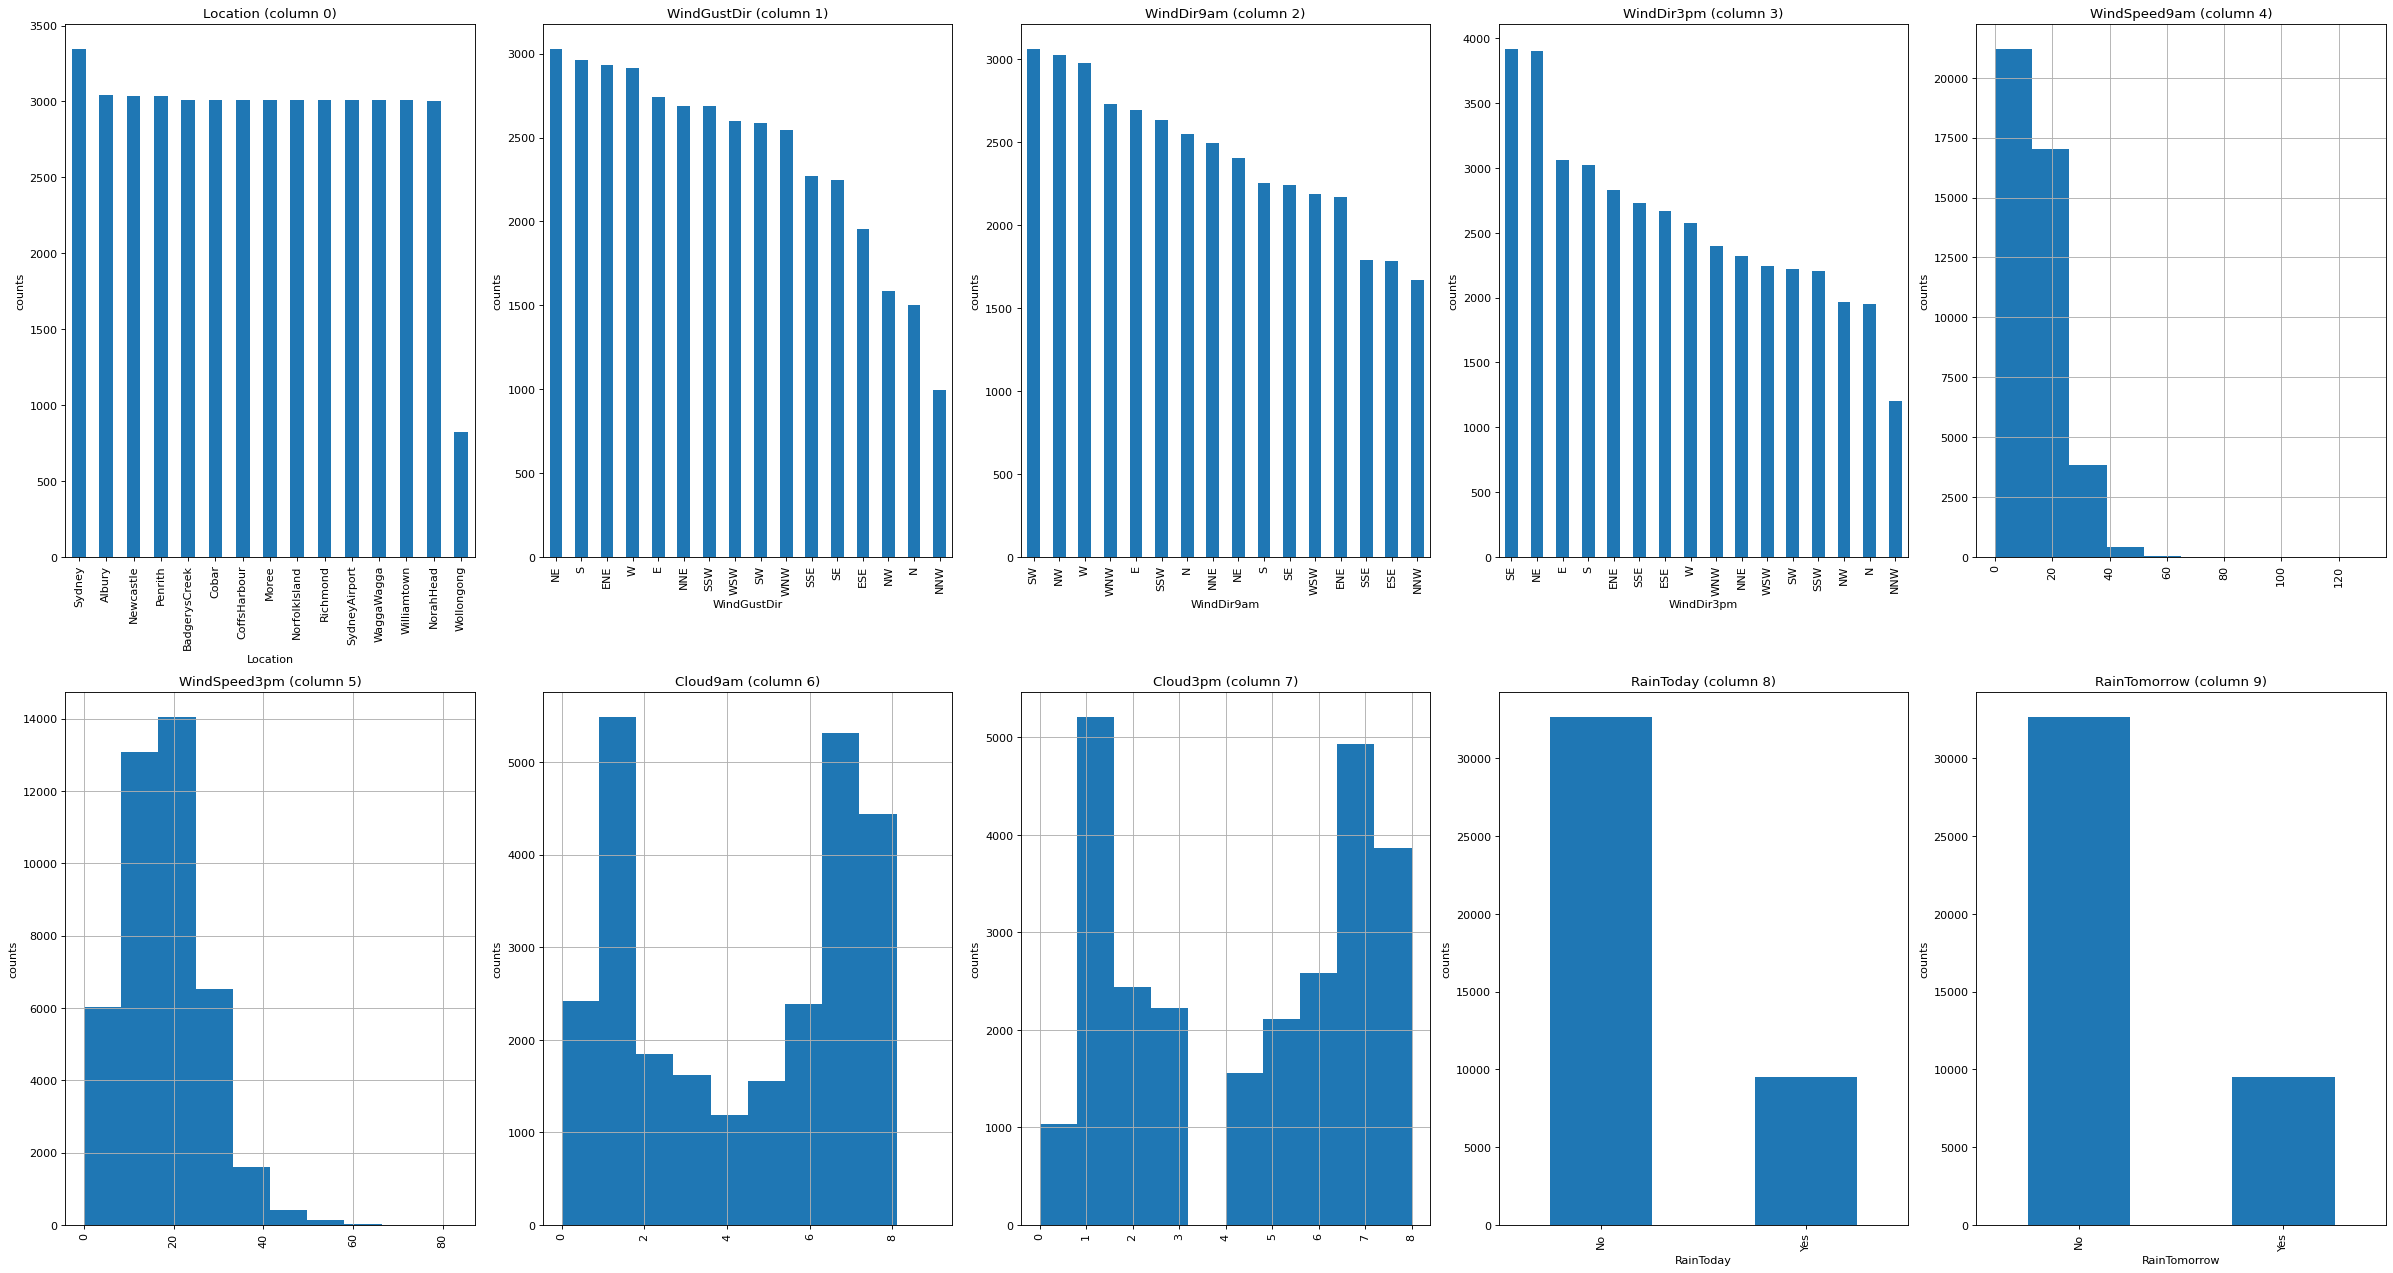

In [ ]:
plotPerColumnDistribution(df, 10,5)

In [ ]:
df.dropna(subset = ['RainTomorrow'], axis = 0, inplace = True)

In [ ]:
df["Location"].unique()


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong'], dtype=object)

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df['Cloud9am'].unique()

array([ 8., nan,  7.,  1.,  0.,  5.,  4.,  2.,  6.,  3.,  9.])

In [ ]:
df.drop(['Evaporation','Cloud9am','Cloud3pm','Date','Location'],axis =1, inplace = True)

In [ ]:
# prompt: label encoder for all categorocal clomuns

from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()
# Iterate over the categorical columns
for col in df.select_dtypes(include='object'):
  # Fit the encoder to the data in the column
  le.fit(df[col])
  # Transform the data in the column using the encoder
  df[col] = le.transform(df[col])
# Print the transformed DataFrame



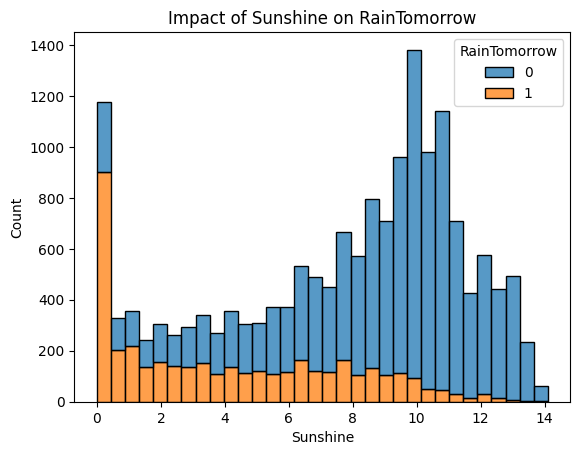

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=df, x="Sunshine", hue="RainTomorrow", multiple="stack")
# Add labels and title
plt.xlabel('Sunshine')
plt.ylabel('Count')
plt.title('Impact of Sunshine on RainTomorrow')

# Show the plot
plt.show()


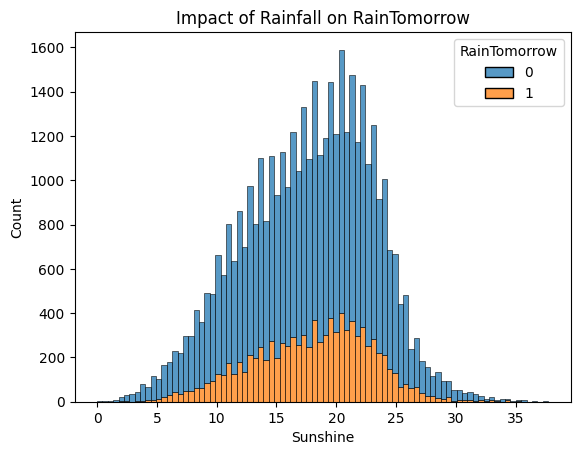

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=df, x="Temp9am", hue="RainTomorrow", multiple="stack")
# Add labels and title
plt.xlabel('Sunshine')
plt.ylabel('Count')
plt.title('Impact of Rainfall on RainTomorrow')

# Show the plot
plt.show()


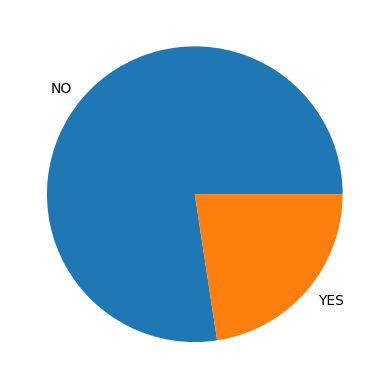

In [ ]:
import matplotlib.pyplot as plt
mylabels = ["NO", "YES"]
plt.pie(df['RainTomorrow'].value_counts(), labels = mylabels)
plt.show()


In [ ]:
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mode()[0])
df['MinTemp'].fillna(df['MinTemp'].mode()[0], inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace=True)

In [ ]:
df['WindGustDir'].fillna(df['WindGustDir'].value_counts().index[0] , inplace = True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(), inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].value_counts().index[0] , inplace = True)

In [ ]:
df['WindDir3pm'].fillna(df['WindDir3pm'].value_counts().index[0] , inplace = True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)

In [ ]:
df['Humidity9am'].fillna(df['Humidity9am'].mean(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mode()[0], inplace=True)


In [ ]:
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)

In [ ]:
df['Temp9am'].fillna(df['Temp9am'].mode()[0], inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mode()[0], inplace=True)

In [ ]:
df['RainToday'].fillna('yes', inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(), inplace=True)

df['RainTomorrow'].fillna('yes', inplace=True)

In [ ]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
#Get Target data
y = df['RainTomorrow']

#Load X Variables into a Pandas Dataframe with columns
X = df.drop(['RainTomorrow'], axis = 1)

# **Split dataset to train and test data randomly**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=2, test_size=0.3)

# **Training: Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()
logModel.fit(X_train,Y_train)
Y_pred = logModel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Evaluating the model**

In [ ]:
print('Accuracy',metrics.accuracy_score(Y_test, Y_pred))
print('Precision',metrics.precision_score(Y_test, Y_pred))
print('Recall',metrics.recall_score(Y_test, Y_pred))

Accuracy 0.8493833017077799
Precision 0.7661987041036717
Recall 0.4908336215842269


# **Training: Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,Y_train)
Y_pred = rf_clf.predict(X_test)


# **Evaluating** **the** **model**

In [ ]:
print('Accuracy',metrics.accuracy_score(Y_test, Y_pred))
print('Precision',metrics.precision_score(Y_test, Y_pred))
print('Recall',metrics.recall_score(Y_test, Y_pred))

Accuracy 0.8493833017077799
Precision 0.7661987041036717
Recall 0.4908336215842269


<Axes: >

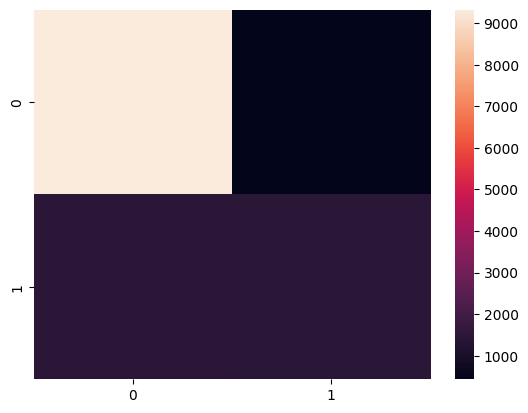

In [ ]:
sns.heatmap(confusion_matrix(Y_test,Y_pred))

In [ ]:
rf_clf.score(X_test,Y_test)

0.8493833017077799

# **KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print('Accuracy',metrics.accuracy_score(Y_test, y_pred))
print('Precision',metrics.precision_score(Y_test, Y_pred))
print('Recall',metrics.recall_score(Y_test, Y_pred))

Accuracy 0.8401328273244781
Precision 0.7661987041036717
Recall 0.4908336215842269


# **Conclusion**:

Based on the results above, we can conclude that KNN and Random Forest are the most accurate models since they are leading in 3 major metrics: Accuracy, Precision, and Recall. For this project, we recommend the immediate implementation of the Random Forest or the KNN model to make the best predictions possible